# The Information Catastrophe: 13 Jan 2021

## Synopsis (tl;dr)

1. The rate of advancement in computing over the last 70 years is staggering, and begs the question of **limits**. 
2. The present rate of "digital content production" (**DCP**) is an estimated $2 \times 10^{19}$ **bits per day**.
3. There are **physical dimensions** to the size of a computational bit:
    * currently the area density is $\sim 25 \frac{nm^2}{bit}$
    * approximate theoretical lower bound is $\sim 1 \times 10^{-10} \frac{m}{bit}$ (scale of an atom)
4. There is an **energy requirement** to create one bit of information, and a theoretical lower limit:
    * currently ?
    * theoretical lower limit to create/erase a bit of information is $k_BT \cdot ln(2)$ Joules
5. There is a **mass-energy equivalence** principle (Vopson 2019).  (presented last meeting)
6. The estimated current **growth rate** of DCP is "double digit", accounting for data being erased.
7. Assuming theoretical limits of computational efficiency, **how long until**:
    * the energy requirements of DCP exceeds the present power capacity/demand of the earth?
    * the *information mass* of DCP exceeds the mass of the earth?


## The Growth Model

>"The total number of bits of information accumulated on the planet after $n$ years of $f\%$ growth:"

$$N_{bits}(n) = \frac{N_b}{f} \cdot \left( \left( f + 1  \right)^{n+1} -1 \right)$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def bits_estimation(n, f=0.01, N_b=7.3E21):
    """
    Total number of bits of information accumulated on the planet after n years of f% growth.
    
    n   = number of years elapsed 
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    
    Returns: annual information production as a bitrate, expressed as log10(bits/year)
    """
    try:
        bits = (N_b/f) * ((f + 1)**(n + 1) - 1)
        return np.log10(bits)
    except OverflowError as e:
        return np.nan

In [32]:
years = list(range(1,10001))
growth_rates = [0.01, 0.05, 0.2, 0.5]

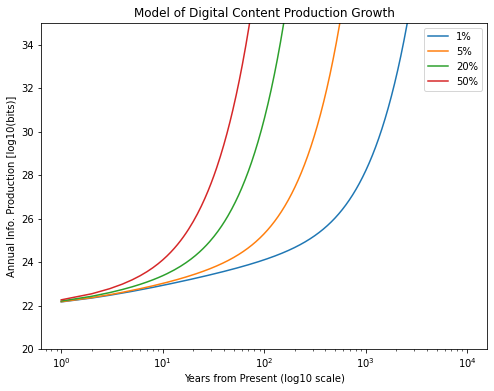

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# evaluate a range of digital content growth rates
for f in growth_rates:
    bits = [bits_estimation(y, f) for y in years]
    ax.plot(years, bits, label=f'{100*f:.0f}%')

ax.set_title('Model of Digital Content Production Growth')
ax.set_xscale('log',base=10) 
ax.set_ylabel('Annual Info. Production [log10(bits)]')
ax.set_xlabel('Years from Present (log10 scale)')
ax.set_ylim(20, 35)
ax.legend()
plt.show()  

## The Energy Model

>"The total energy necessary to create all the digital information in a given n-th year, assuming $f\%$ year-on-year growth."

$$Q_{info}(n^{th}) = N_b \cdot k_B T \cdot ln(2) \cdot (f + 1)^n$$

In [34]:
def power_requirement(n, f=0.01, N_b=7.3E21, T=300):
    """
    The total energy necessary to create all the digital information in a given n-th year, 
    assuming 𝑓% year-on-year growth.
    
    n   = nth year from current year
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    k_B = Boltzmann constant (1.38064852 × 10-23 m2 kg s-2 K-1)
    T = temperature at which information is stored (assumed to be 300K in the study)
    """
    k_B = 1.38064852E-23 
    annual_seconds = 3.154E7   # number of seconds in a year
    
    try:
        energy = N_b * k_B * T * np.log(2) * (f + 1)**(n)
        return np.log10(energy / annual_seconds)
    except OverflowError as e:
        return np.nan
        

## The Information Mass Model

>"The total information mass accumulated on the planet after $n$ years of $f\%$ growth."

$$M_{info}(n) = N_b \cdot \frac{k_B T \cdot ln(2)}{f\cdot c^2} \cdot \left((f + 1)^{n+1} -1 \right)$$

In [35]:
def mass_energy_equivalent(n, f=0.01, N_b=7.3E21, T=300):
    """
    The growth rate of 'rest mass' corresponding to information production.
    
    n   = nth year from current year
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    k_B = Boltzmann constant (1.38064852 × 10-23 m^2 kg s^-2 K^-1)
    T = temperature at which information is stored (assumed to be 300K in the study)
    c = speed of light 3.0 x 10^8 [m/s]
    """
    k_B = 1.38064852E-23     
    c = 3.0E8                
    
    try: 
        # [kg] mass of a digital bit of information at room temperature
        m_bit = k_B * T * np.log(2) / c**2       
        info_mass = N_b * (m_bit / f) * ((f + 1)**(n+1) - 1)    
        return np.log10(info_mass)
    except OverflowError:
        return np.nan   

<ipython-input-34-54890ad43d51>:16: RuntimeWarning: overflow encountered in double_scalars
  energy = N_b * k_B * T * np.log(2) * (f + 1)**(n)


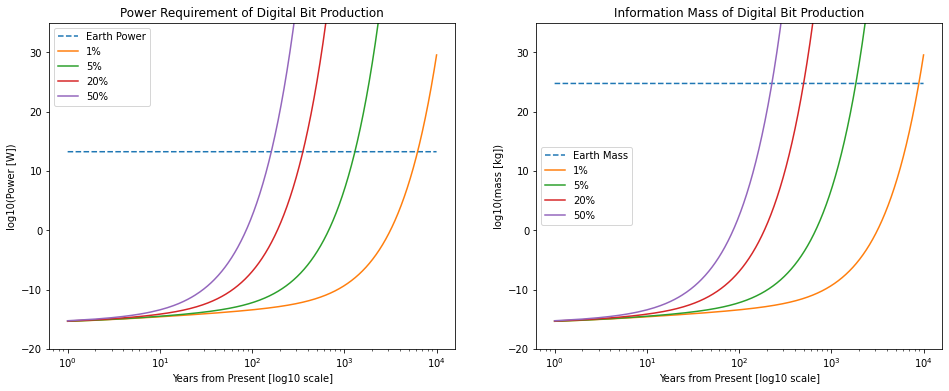

In [36]:
# evaluate a range of mass-energy equivalent growth rates
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# plot the total current power use on earth
p_earth = np.log10(18.5E12) 
ax[0].plot(years, [p_earth for y in years], label='Earth Power', linestyle='dashed')

# plot the earth's mass [log10(kg)]
m_earth = np.log10(6E24) 
ax[1].plot(years, [m_earth for y in years], label='Earth Mass', linestyle='dashed')

# plot the power requirement for the range of growth rates
# and the information mass for the range of growth rates
for f in growth_rates:
    bits = [mass_energy_equivalent(y, f) for y in years]
    power = [power_requirement(y, f) for y in years]
    
    ax[0].plot(years, bits, label=f'{100*f:.0f}%')
    ax[1].plot(years, bits, label=f'{100*f:.0f}%')

ax[0].set_title('Power Requirement of Digital Bit Production')
ax[0].set_xscale('log',base=10) 
ax[0].set_ylabel('log10(Power [W])')
ax[0].set_xlabel('Years from Present [log10 scale]')
ax[0].set_ylim(-20, 35)
ax[0].legend()

ax[1].set_title('Information Mass of Digital Bit Production')
ax[1].set_xscale('log',base=10) 
ax[1].set_ylabel('log10(mass [kg])')
ax[1].set_xlabel('Years from Present [log10 scale]')
ax[1].set_ylim(-20, 35)
ax[1].legend()
plt.show()  

## Questions

1. How does information mass relate to hardware mass? 
    * if information mass is a small fraction of the mass of a high density storage device, would storage devices reach earth-mass long before information does?
2. How do we think about the critical path to growth?
    * when does adding $f\%$ of electrical capacity each year **in absolute terms** become too large?  Is it possible adding the capacity would be a limiting factor before the total exploitable energy could be a factor?
    * same question but for area -- what year would we have to bulldoze an entire continent just to yield the annual marginal DCP? 
3. What problems would computers generating earth-scale information mass be working on?
    * lots of problems still not solvable with hypothetical computational power
    * something as simple as chess is still hard. [Shannon Number](https://en.wikipedia.org/wiki/Shannon_number): conservative estimate of the game-tree complexity is $10^{120}$
4. What other limits related to computation might come first?
    * input data? i.e. many problems are already data sparse
    * sensing resolution 
    * data transmission?
    * computation time? 

## How does the Area Requirement Grow under current and theoretical limit memory density?

How can the height dimension be estimated?  $25 nm^2$

In [37]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

viridis = cm.get_cmap('viridis', len(growth_rates))
cmap = viridis(np.linspace(0, 1, len(growth_rates)))[::-1]

In [38]:
def area_estimation(n, f=0.01, N_b=7.3E21, unit_area=25E-9, height_approx=10):
    """
    Approximate space required to store bits of information accumulated on the planet after n years of f% growth.
    
    n   = number of years elapsed 
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    unit_area = approximate memory (linear) density (m/bit)
    height_approx = how high is the memory structure, assuming linear density equals unit_area
    
    Returns: area taken up by all bits, in km^2
    """
    try:
        bits = (N_b/f) * ((f + 1)**(n + 1) - 1)
        # approximate the area of a 100m tall memory device
        return np.log10(bits * unit_area * unit_area / (height_approx / 1000))
    except OverflowError as e:
        return np.nan

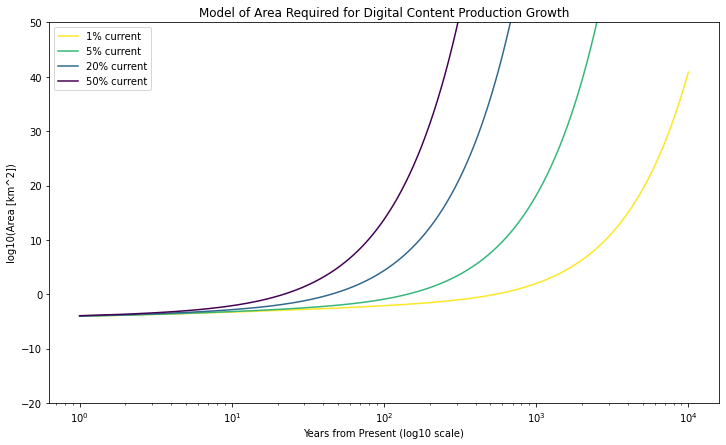

In [39]:
A_ocean = 0.7 * 362E6  # [km^2] 70% of the ocean floor is the abyssal plains, ocean is 70% of surface of earth (362 million km^2),
A_CA = 10E6  # area of Canada, km^2
A_nd = 41.5E3 # area of the Netherlands, km^2

# memory density inputs
A_bit = 25E-9 / 1E6    # 25  nm^2 to km^2 size of 1 bit at current storage density
A_atom = 1E-10 / 1E6   # 0.1 nm^2 to km^2 (some atoms not spherical)

# plot area growth
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
# evaluate a range of digital content growth rates
i = 0
for f in growth_rates:
    
    # assume a 100m high memory structure monolith
    h_memory = 100
    current_area = [area_estimation(y, f, unit_area=A_bit, height_approx=h_memory) for y in years]
    limit_area = [area_estimation(y, f, unit_area=A_atom, height_approx=h_memory) for y in years]
    
    ax.plot(years, current_area, label=f'{100*f:.0f}% current', 
            color=cmap[i], linestyle='solid')
#     ax.plot(years, limit_area, label=f'{100*f:.0f}% limit', 
#             color=cmap[i], linestyle='dashed')
    i += 1

# plot the area of the abyssal plains of the ocean floor
# ax.plot(years, [np.log10(A_nd) for y in years], label='Nederland', linestyle='dotted')
# ax.plot(years, [np.log10(A_CA) for y in years], label='Canada', linestyle='dotted')
# ax.plot(years, [np.log10(A_ocean) for y in years], label='Ocean floor', linestyle='dotted')


ax.set_title('Model of Area Required for Digital Content Production Growth')
ax.set_xscale('log',base=10) 
ax.set_ylabel('log10(Area [km^2])')
ax.set_xlabel('Years from Present (log10 scale)')
ax.set_ylim(-20, 50)
ax.legend()
plt.show() 

## References

1. Vopson, Melvin M. "The Information Catastrophe." *AIP Advances*, vol. 10, no. 8, 2020, pp. 85014-085014-4.

2. Ikonen, Joni, Juha Salmilehto, and Mikko Möttönen. "Energy-Efficient Quantum Computing." *Npj Quantum Information*, vol. 3, no. 1, 2017;2016;, pp. 1-7.

## Notes from Presentation 

### Historical Growth Rates

1.  Growth in information production and memory density has never been linear (maybe logistic and punctuated?) for any medium from stone to papyrus to paper to transistor, but the expression of unchecked growth in digital content production (DCP) is interesting as a timer from today on technological advancement.  Had the first stone masons looked at available local quarry production and labour intensity versus growth in recorded information, how far would their information catstrophe horizon have been?  How about for the ancient egyptian scribe in terms of papyrus and ink supply and production?  Babbage and Lovelace for mechanical computation?  Turing and von Neumann and modern computation?  Vopson's use of theoretical limits of space and thermal efficiency in computation represent bounds that today don't seem achievable, and this only provides greater emphasis for the deadline that looms ahead.  A few other comparisons help put into perspective the magnitude of advance that must be realized in order to avoid displacing or otherwise disrupting ecosystems to satisfy our appetite for cat videos.  


### Quantified Constraints on DCP Growth

1.  Complete capture of solar energy input:
    * assuming albedo of 30%
    * $174 \space \text{PetaWatts} \times 0.7 = 1.218\times 10^{17} W$ (if all incident solar radiation were exploited)
        * the result of further increase would require reducing earth's albedo, which would increase temperature of earth?
    * Total world human energy consumption (excluding food) $= 150 \frac{\text{TWh}}{year} = 1.7 \times 10^{10} W$
        * factor of $~7\times 10^6$ expansion from current energy consumption
        
2.  Energy and space overhead for computing:
    * how much energy is required to sense, transmit, and process one bit of information for every bit erased or written? 
    * how much space is required for ancillary equipment to house this immense memory?  
    * are these just linear factors that have no substantial impact on exponential growth?
    
3.  Rates vs. total energy
    * is it possible that the marginal annual energy capacity could limit the growth before the total energy use would?
    * is it possible that the marginal annual "real estate" could limit the growth before the total area would? i.e. production rate of data centers?  Shortly after the *total* area required for memory centers is the size of entire countries, areas the size of increasingly large countries are added each year.  The total area of the Abyssal Plains is quite large, but even then it barely nudges the mark.
    *  
        